In [ ]:
# Start writing code here...
import numpy as np
import pandas as pd
#from copulae import NormalCopula
#from copulae import GaussianCopula, StudentCopula, ClaytonCopula, FrankCopula, GumbelCopula
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv('10assets.csv')
data=data.drop('Date',axis=1)

# for c in [ 'Shell', 'Philips', 'Heineken', 'TomTom', 'Aegon', 'ING',
#        'PostNL', 'SP500', 'DJ', 'AEX']:
#        data[c]=np.log1p(data[c]).diff()
# ret=data.dropna() # drop first row
# ret # log return
ret=np.log(data).diff().dropna()
ret

,Shell,Philips,Heineken,TomTom,Aegon,ING,Apple,Micro,SP500,AEX
1,0.006927,-0.002328,-0.021223,0.047346,-0.002290,0.019074,0.002614,0.000323,0.003111,-0.002949
2,-0.007390,-0.015504,0.008124,-0.002894,-0.003549,0.001349,-0.017117,-0.006156,0.000545,-0.001580
3,-0.003251,-0.005698,-0.014185,0.018665,0.020086,0.023969,-0.001329,-0.010454,0.003993,-0.002727
4,-0.005597,0.001428,0.000608,0.004258,0.030486,0.022122,0.006627,0.006873,0.002878,0.004073
5,0.003269,0.009465,0.032280,-0.008535,-0.015632,-0.024757,-0.009290,-0.012802,0.001745,-0.004161
...,...,...,...,...,...,...,...,...,...,...
2576,-0.009084,0.012847,0.015328,-0.004228,-0.010311,0.002751,-0.002002,0.010859,0.004933,0.005745
2577,0.003037,0.000000,0.004989,0.006336,-0.008229,-0.010124,0.016187,0.000000,0.000866,-0.000066
2578,0.004539,0.003868,-0.005405,-0.005277,-0.005849,0.000000,0.000985,-0.000191,-0.000195,0.000181
2581,-0.009461,-0.008682,-0.008525,-0.015831,0.001709,-0.006521,0.005918,-0.008656,-0.005798,-0.008514


In [ ]:
scaler = StandardScaler()
scaler.fit(ret) # fit the training data
ret_t=scaler.transform(ret) # transform the training data, return_transform
feat_cols = ['Shell', 'Philips', 'Heineken', 'TomTom', 'Aegon', 'ING', 'Apple','Micro', 'SP500', 'AEX']
ret_t=pd.DataFrame(ret_t,columns=feat_cols) # ret_t is standardlized(mean=0, std=1)
ret_t

,Shell,Philips,Heineken,TomTom,Aegon,ING,Apple,Micro,SP500,AEX
0,0.529338,-0.164363,-1.777671,1.713267,-0.107228,0.827273,0.115582,-0.020419,0.291448,-0.299592
1,-0.574959,-0.995232,0.644960,-0.109965,-0.167166,0.051175,-1.097852,-0.471540,0.016553,-0.169275
2,-0.255651,-0.376858,-1.196624,0.672437,0.957654,1.041598,-0.126921,-0.770830,0.386008,-0.278497
3,-0.436640,0.072480,0.024488,0.149607,1.452617,0.960717,0.362345,0.435641,0.266453,0.369044
4,0.247185,0.579337,2.639056,-0.314661,-0.742171,-1.091837,-0.616515,-0.934288,0.145122,-0.415068
...,...,...,...,...,...,...,...,...,...,...
2398,-0.705600,0.792597,1.239683,-0.158376,-0.488939,0.112579,-0.168315,0.713161,0.486664,0.528196
2399,0.229327,-0.017542,0.386129,0.224999,-0.389849,-0.451159,0.950247,-0.042912,0.050883,-0.025069
2400,0.345130,0.226348,-0.471898,-0.196434,-0.276624,-0.007873,0.015405,-0.056184,-0.062827,-0.001626
2401,-0.734656,-0.565014,-0.729407,-0.579454,0.083099,-0.293379,0.318722,-0.645614,-0.663120,-0.829512


In [ ]:
ret_t.corr()

,Shell,Philips,Heineken,TomTom,Aegon,ING,Apple,Micro,SP500,AEX
Shell,1.000000,0.399781,0.312757,0.249168,0.459968,0.430801,0.197821,0.262030,0.408929,0.681311
Philips,0.399781,1.000000,0.404631,0.341161,0.508838,0.567234,0.282628,0.323645,0.496838,0.735760
Heineken,0.312757,0.404631,1.000000,0.272553,0.300057,0.315675,0.168687,0.231185,0.334157,0.571096
TomTom,0.249168,0.341161,0.272553,1.000000,0.374255,0.418807,0.160510,0.168095,0.297284,0.469491
Aegon,0.459968,0.508838,0.300057,0.374255,1.000000,0.737419,0.232551,0.264206,0.473440,0.728917
ING,0.430801,0.567234,0.315675,0.418807,0.737419,1.000000,0.257196,0.333555,0.546758,0.798537
Apple,0.197821,0.282628,0.168687,0.160510,0.232551,0.257196,1.000000,0.458543,0.596215,0.337304
Micro,0.262030,0.323645,0.231185,0.168095,0.264206,0.333555,0.458543,1.000000,0.692540,0.416129
SP500,0.408929,0.496838,0.334157,0.297284,0.473440,0.546758,0.596215,0.692540,1.000000,0.635835
AEX,0.681311,0.735760,0.571096,0.469491,0.728917,0.798537,0.337304,0.416129,0.635835,1.000000


In [ ]:
ret_t=pd.read_csv('std_log_return.csv',)
ret_t=ret_t.drop('Unnamed: 0',axis=1)
ret_t

,Shell,Philips,Heineken,TomTom,Aegon,ING,Apple,Micro,SP500,AEX
0,0.525987,-0.162990,-1.787387,1.712487,-0.104789,0.824732,0.104519,-0.022952,0.287190,-0.300422
1,-0.573466,-0.985404,0.636871,-0.110183,-0.164163,0.052044,-1.104036,-0.473075,0.013331,-0.170970
2,-0.255559,-0.373322,-1.205950,0.671977,0.950079,1.038115,-0.137010,-0.771702,0.381394,-0.279468
3,-0.435753,0.071442,0.015983,0.149309,1.440387,0.957589,0.350289,0.432097,0.262290,0.363778
4,0.245072,0.573142,2.632307,-0.314816,-0.733760,-1.085944,-0.624634,-0.934798,0.141415,-0.415133
...,...,...,...,...,...,...,...,...,...,...
2487,0.227292,-0.017663,0.377867,0.224677,-0.384752,-0.448082,0.935827,-0.045396,0.047532,-0.027721
2488,0.342587,0.223745,-0.480737,-0.196625,-0.272592,-0.006744,0.004744,-0.058639,-0.065749,-0.004434
2489,0.138813,-0.131150,0.532105,0.376708,0.014693,-0.168345,1.122318,0.648613,0.504767,0.238922
2490,-0.732463,-0.559564,-0.738419,-0.579528,0.083748,-0.290995,0.306842,-0.646764,-0.663779,-0.826827


In [ ]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(ret_t)
pc_col=['PC'+str(i+1) for i in range(ret_t.shape[1])] # columns
principalDf = pd.DataFrame(data = principalComponents, columns = pc_col)

In [ ]:
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.316165,-0.118859,2.017279,-0.838269,-1.240702,0.251988,-0.585106,0.575563,-0.074378,0.371144
1,-0.843166,-0.661431,-0.467102,-0.210281,0.274188,0.673270,0.923292,0.484229,0.426384,-0.106528
2,0.150146,-0.613867,1.924090,-0.315767,0.017166,-0.171963,0.503666,0.346830,0.477461,0.309401
3,1.225872,-0.043680,0.873697,-0.105901,0.767540,0.034681,0.817104,-0.398160,-0.150735,0.036080
4,-0.310599,-0.739930,-2.927300,-0.182685,0.191319,-0.324900,-0.046516,-0.005661,0.920744,0.593442
...,...,...,...,...,...,...,...,...,...,...
2487,0.113760,0.569897,-0.539503,-0.336124,-0.515274,-0.671079,-0.046100,-0.073839,-0.098534,-0.000722
2488,-0.128410,0.044646,0.213462,0.377314,-0.202867,-0.100052,-0.482696,0.147186,-0.083106,0.014390
2489,0.864109,1.001761,-0.399211,-0.448251,-0.383826,-0.273553,0.307519,-0.179195,-0.120268,-0.091838
2490,-1.493121,0.162879,0.650309,0.070145,0.320168,-0.661353,0.375654,-0.252622,-0.117554,0.129269


In [ ]:
exp_variance_ratio=pca.explained_variance_ratio_
exp_variance=pca.explained_variance_
exp_variance_cumsum=np.cumsum(exp_variance_ratio)

In [ ]:
exp_variance

array([4.89650506, 1.34077547, 0.80173723, 0.77166148, 0.61278605,
       0.55036167, 0.47729584, 0.25716971, 0.22485576, 0.07086617])

In [ ]:
exp_variance_cumsum

array([0.48945402, 0.62347776, 0.70361931, 0.78075449, 0.84200851,
       0.89702259, 0.94473302, 0.97043967, 0.99291623, 1.        ])

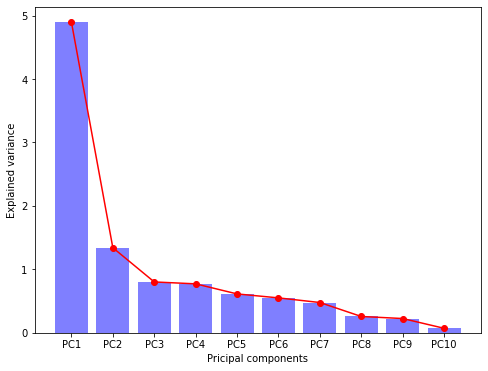

In [ ]:

xx=np.arange(1,11)
plt.figure(figsize=(8,6))
plt.plot(xx,exp_variance,'-o',color='red')
plt.bar(xx,exp_variance,color='blue',alpha=0.5)
plt.xticks(xx,pc_col)
#plt.grid()
plt.xlabel('Pricipal components')
plt.ylabel('Explained variance')
plt.savefig('PCA_bar.jpg',dpi=100)

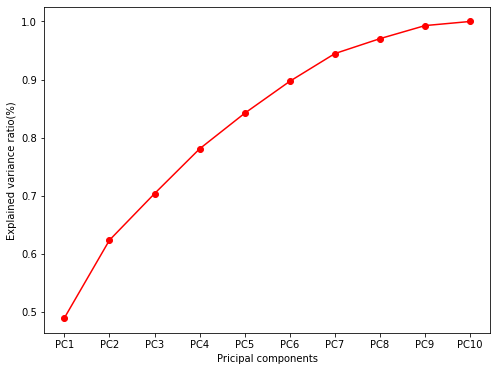

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(xx,exp_variance_cumsum,'-o',color='red')
plt.xticks(xx,pc_col)
plt.xlabel('Pricipal components')
plt.ylabel('Explained variance ratio(%)')
plt.savefig('PCA_ratio.jpg',dpi=100)

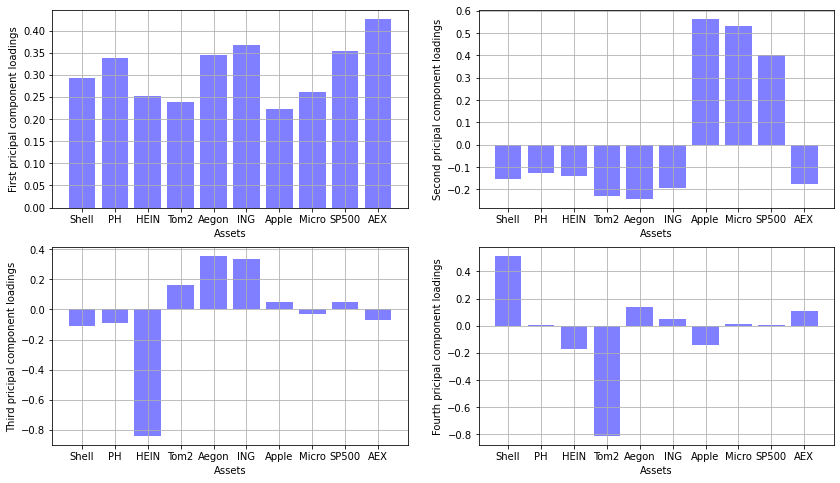

In [ ]:
# feat_cols = ['Shell', 'PH', 'HEIN', 'Tom2', 'Aegon', 'ING',
#        'PostNL', 'SP500', 'DJ', 'AEX']
feat_cols = ['Shell', 'PH', 'HEIN', 'Tom2', 'Aegon', 'ING', 'Apple','Micro', 'SP500', 'AEX']
xx=np.arange(1,11)
fig = plt.figure(figsize=(14,8))
plt.subplot(2, 2, 1)
plt.bar(xx,pca.components_[0],color='blue',alpha=0.5)
plt.xticks(xx, feat_cols)
plt.grid()
plt.ylabel('First pricipal component loadings')
plt.xlabel('Assets')

plt.subplot(2, 2, 2)
plt.bar(xx,pca.components_[1],color='blue',alpha=0.5)
plt.xticks(xx, feat_cols)
plt.grid()
plt.ylabel('Second pricipal component loadings')
plt.xlabel('Assets')

plt.subplot(2, 2, 3)
plt.bar(xx,pca.components_[2],color='blue',alpha=0.5)
plt.xticks(xx, feat_cols)
plt.grid()
plt.ylabel('Third pricipal component loadings')
plt.xlabel('Assets')

plt.subplot(2, 2, 4)
plt.bar(xx,pca.components_[3],color='blue',alpha=0.5)
plt.xticks(xx, feat_cols)
plt.grid()
plt.ylabel('Fourth pricipal component loadings')
plt.xlabel('Assets')

plt.savefig('PCA_loadings.jpg',dpi=100)

Text(0.5, 0, 'Assets')

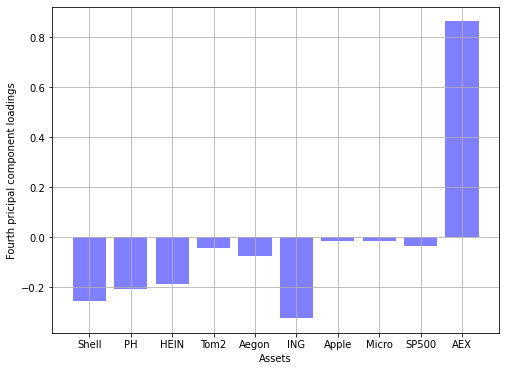

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(xx,-pca.components_[9],color='blue',alpha=0.5)
plt.xticks(xx, feat_cols)
plt.grid()
plt.ylabel('Fourth pricipal component loadings')
plt.xlabel('Assets')

In [ ]:
!pip install factor_analyzer==0.3.2

     |████████████████████████████████| 40 kB 3.0 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40380 sha256=7ed251d2072e0adc4d80776042c863a30a6e9dcf832140526878f04073ac9624
  Stored in directory: /root/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


In [ ]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [ ]:
calculate_bartlett_sphericity(ret_t)

(14747.558818677648, 0.0)

In [ ]:
#fa = FactorAnalyzer(n_factors=10, rotation='oblimin',method='ml')
fa = FactorAnalyzer(n_factors=10, rotation='varimax',method='ml')
fa.fit(ret_t)

FactorAnalyzer(method='ml', n_factors=10, rotation='varimax',
               rotation_kwargs={})

In [ ]:
fa.get_eigenvalues()

(array([4.89454017, 1.34023743, 0.8014155 , 0.77135183, 0.61254015,
        0.55014082, 0.47710431, 0.25706652, 0.22476553, 0.07083774]),
 array([ 4.57541726e+00,  9.24583620e-01,  3.79078399e-01,  2.66779760e-01,
         8.34626370e-02,  5.10123831e-02, -2.69863109e-04, -3.19178326e-02,
        -7.88078459e-02, -9.89770807e-02]))

In [ ]:
fa.get_factor_variance()[2]

#variance (numpy array) – The factor variances.
#proportional_variance (numpy array) – The proportional factor variances.
#cumulative_variances (numpy array) – The cumulative factor variances.

array([0.24794143, 0.428777  , 0.52581959, 0.59982795, 0.60703614,
       0.60703614, 0.60703614, 0.60703614, 0.60703614, 0.60703614])

In [ ]:
fa.get_factor_variance()[1]

array([0.24794143, 0.18083556, 0.0970426 , 0.07400835, 0.0072082 ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

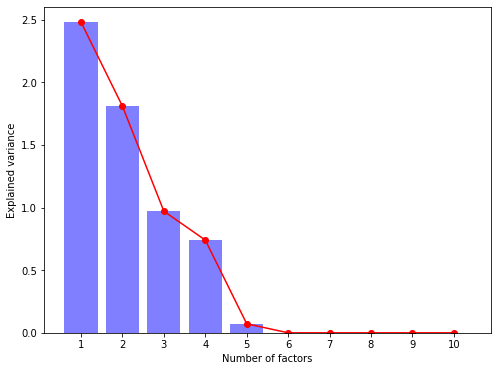

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(xx,fa.get_factor_variance() [0],'-o',color='red')
plt.bar(xx,fa.get_factor_variance() [0],color='blue',alpha=0.5)
plt.xticks(xx)
#plt.grid()
plt.xlabel('Number of factors')
plt.ylabel('Explained variance')
#plt.savefig('FA_bar.jpg',dpi=100)

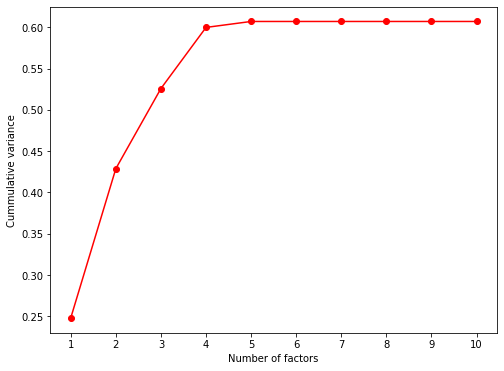

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(xx,fa.get_factor_variance()[2],'-o',color='red') # The cumulative factor variances
plt.xticks(xx)
plt.xlabel('Number of factors')
plt.ylabel('Cummulative variance')
#plt.savefig('FA_ratio.jpg',dpi=100)

In [ ]:
fa.loadings_

array([[ 0.33823117,  0.17691293,  0.24729796,  0.63203432,  0.01651831,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.51708801,  0.25602346,  0.42466646,  0.17027463,  0.24913639,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.23007776,  0.14923753,  0.61013785,  0.17531075, -0.0016973 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.42179064,  0.11949112,  0.25866723,  0.05607951, -0.02532984,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.74963163,  0.18252887,  0.12827388,  0.23318311,  0.00398861,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.81561902,  0.24435599,  0.16351292,  0.17481469,  0.03112714,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.10645329,  0.6346597 ,  0.08492452,  0.05616554,  0.0295713 ,
         0.        ,  0.        ,  0.        

Text(0.5, 0, 'Assets')

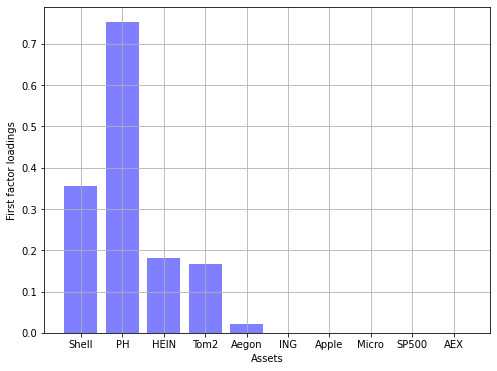

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(xx,fa.loadings_[8],color='blue',alpha=0.5)
plt.xticks(xx, feat_cols)
plt.grid()
plt.ylabel('First factor loadings')
plt.xlabel('Assets')

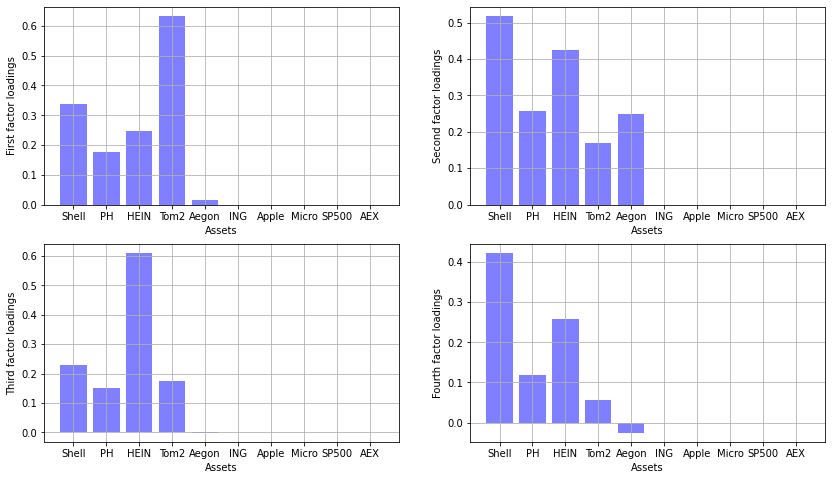

In [ ]:
# feat_cols = ['Shell', 'PH', 'HEIN', 'Tom2', 'Aegon', 'ING',
#        'PostNL', 'SP500', 'DJ', 'AEX']

fig = plt.figure(figsize=(14,8))
plt.subplot(2, 2, 1)
plt.bar(xx,fa.loadings_[0],color='blue',alpha=0.5)
plt.xticks(xx, feat_cols)
plt.grid()
plt.ylabel('First factor loadings')
plt.xlabel('Assets')

plt.subplot(2, 2, 2)
plt.bar(xx,fa.loadings_[1],color='blue',alpha=0.5)
plt.xticks(xx, feat_cols)
plt.grid()
plt.ylabel('Second factor loadings')
plt.xlabel('Assets')

plt.subplot(2, 2, 3)
plt.bar(xx,fa.loadings_[2],color='blue',alpha=0.5)
plt.xticks(xx, feat_cols)
plt.grid()
plt.ylabel('Third factor loadings')
plt.xlabel('Assets')

plt.subplot(2, 2, 4)
plt.bar(xx,fa.loadings_[3],color='blue',alpha=0.5)
plt.xticks(xx, feat_cols)
plt.grid()
plt.ylabel('Fourth factor loadings')
plt.xlabel('Assets')
#plt.savefig('FA_loadings.jpg',dpi=100)

In [ ]:
fa2 = FactorAnalyzer(n_factors=3, rotation='varimax',method='ml')
fa2.fit(ret_t)

FactorAnalyzer(method='ml', rotation='varimax', rotation_kwargs={})

TypeError: bar() missing 1 required positional argument: 'height'

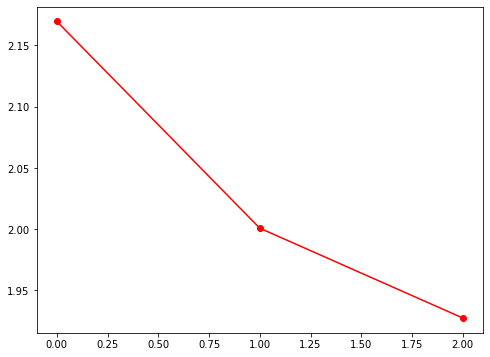

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(fa2.get_factor_variance() [0],'-o',color='red')
plt.bar(fa2.get_factor_variance() [0],color='blue',alpha=0.5)
plt.xticks(xx)
#plt.grid()
plt.xlabel('Number of factors')
plt.ylabel('Explained variance')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=645d3506-ee2c-44c9-a8e9-fa6f8711818a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>